In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [7]:
df.duplicated().sum()

np.int64(1081)

In [8]:
df.drop_duplicates(inplace=True)

## Count plot for legit and fraud transaction

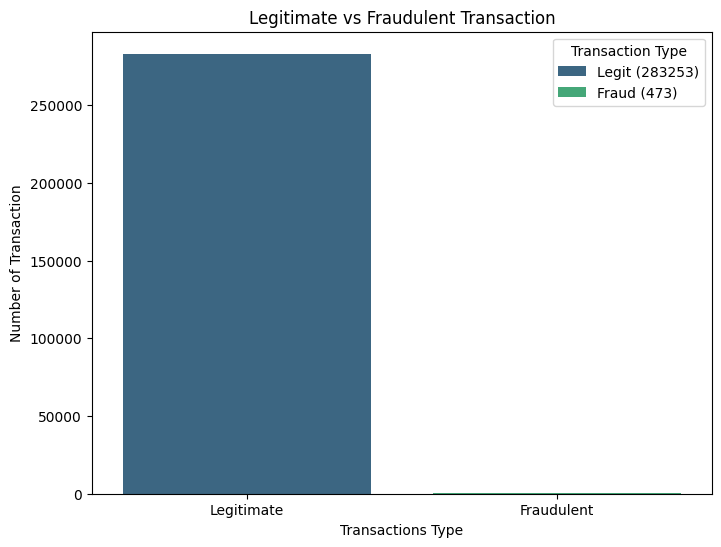

In [9]:
plt.figure(figsize=(8, 6))
df['class_label'] = df['Class'].map({0: 'Legitimate', 1: 'Fraudulent'})

counts = df['class_label'].value_counts()
legit_count = counts['Legitimate']
fraud_count = counts['Fraudulent']
labels = (f"Legit ({legit_count})", f"Fraud ({fraud_count})")

sns.countplot(data=df, x='class_label', hue='class_label', palette='viridis')
plt.legend(labels=labels, title='Transaction Type')
plt.title('Legitimate vs Fraudulent Transaction')
plt.xlabel('Transactions Type')
plt.ylabel('Number of Transaction')
plt.show()

In [10]:
df = df.drop(['class_label'], axis=1)

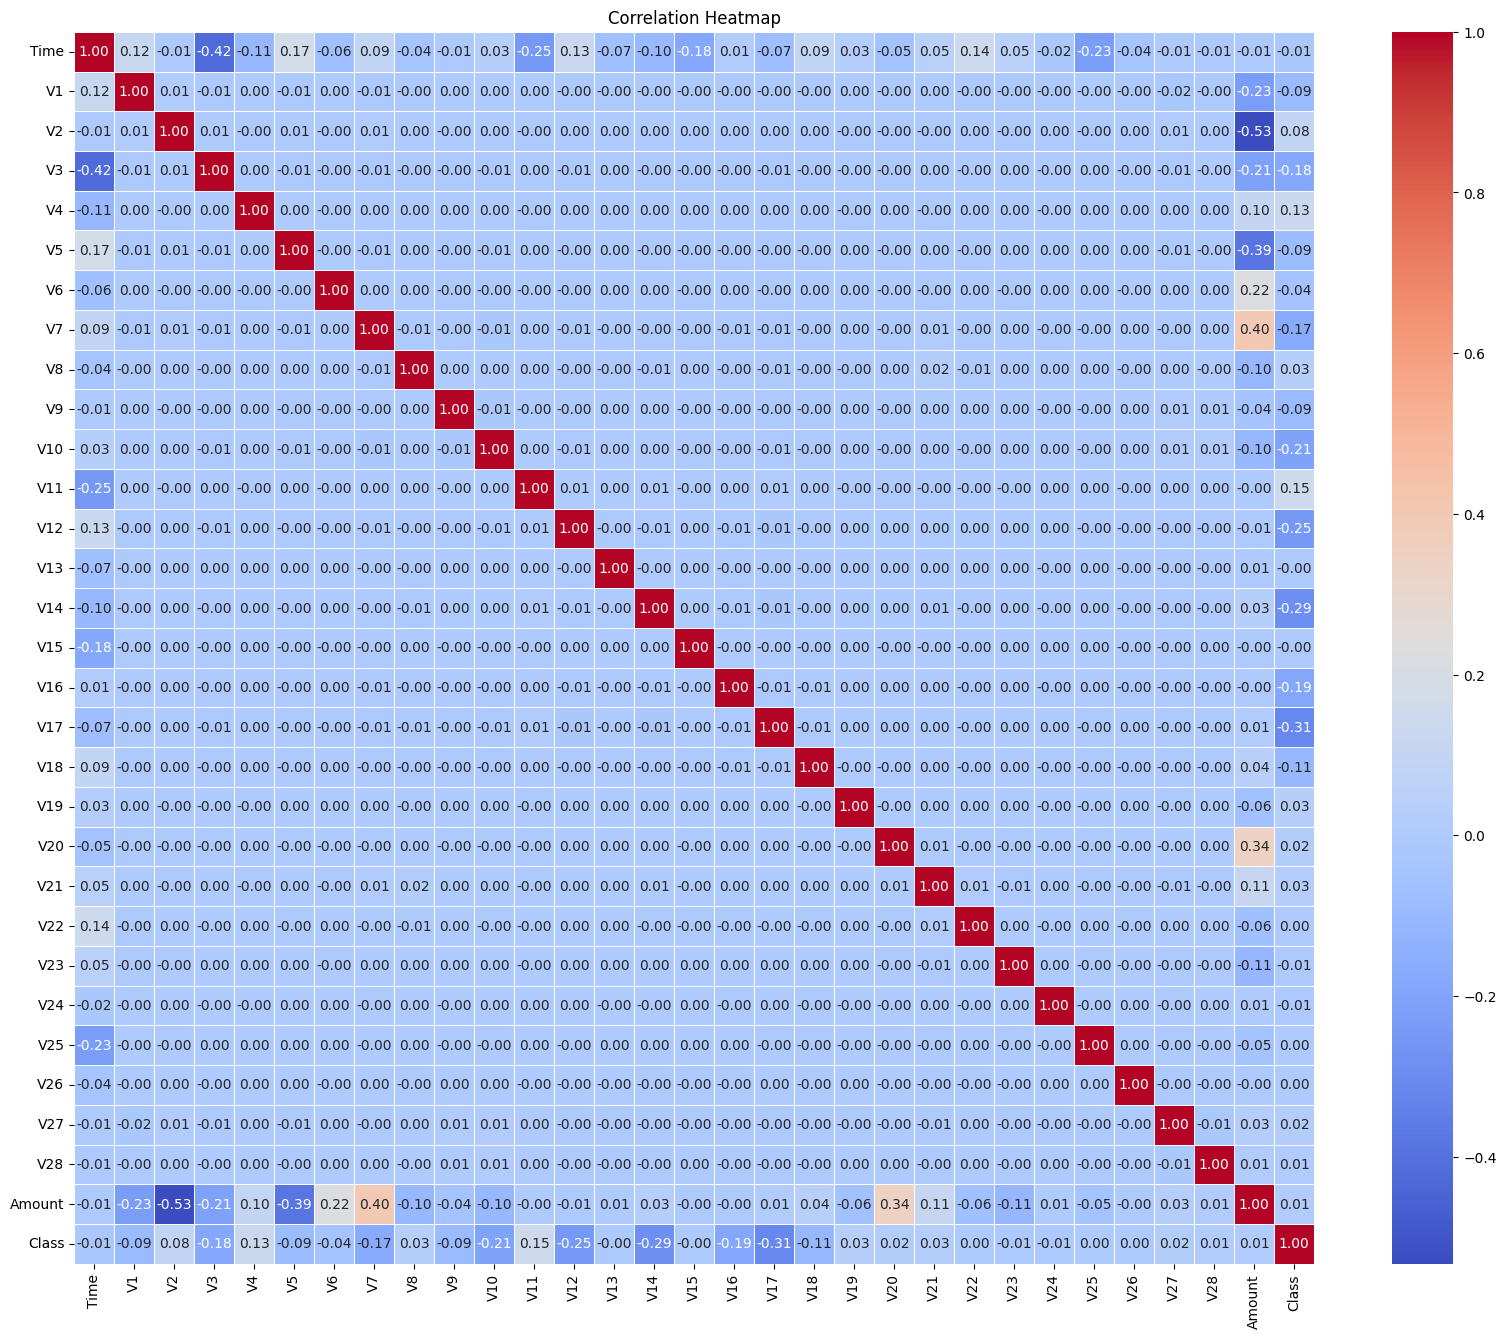

In [11]:
## heatmap visualization

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Scaling
scalar = StandardScaler()
df['scaled_time'] = scalar.fit_transform(df['Time'].values.reshape(-1, 1))
df['scaled_amount'] = scalar.fit_transform(df['Amount'].values.reshape(-1, 1))

In [13]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [14]:
df = df[['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount', 'Class']] + ['Class']]

In [15]:
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996823,0.244200,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996823,-0.342584,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996802,1.158900,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996802,0.139886,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996781,-0.073813,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

<h2 style = 'color:green'>Apply Unsupervised Models</h2>

## Isolation Forest

In [17]:
from sklearn.ensemble import IsolationForest

In [18]:
iso = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
iso.fit(X)

IsolationForest(contamination=0.001, random_state=42)

In [19]:
y_pred_iso = iso.predict(X)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

In [20]:
classification_report(y, y_pred_iso)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    283253\n           1       0.35      0.21      0.26       473\n\n    accuracy                           1.00    283726\n   macro avg       0.67      0.60      0.63    283726\nweighted avg       1.00      1.00      1.00    283726\n'

In [21]:
cm_iso = confusion_matrix(y, y_pred_iso)
cm_iso

array([[283067,    186],
       [   375,     98]])

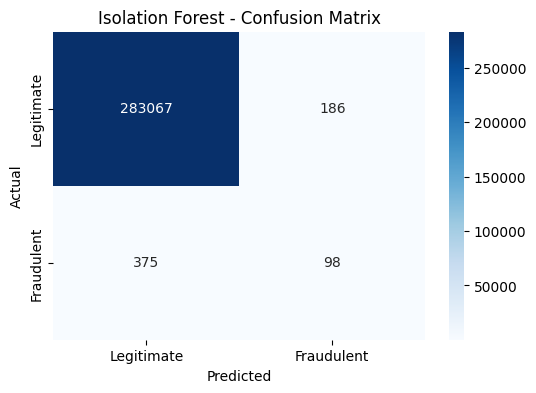

In [22]:
## Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_iso, annot=True, cmap='Blues', fmt='d')
plt.xticks(ticks=[0.5, 1.5], labels= ['Legitimate', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels= ['Legitimate', 'Fraudulent'])
plt.title('Isolation Forest - Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
roc_auc_score(y, y_pred_iso)

np.float64(0.6032657519533949)

In [24]:
# PCA Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

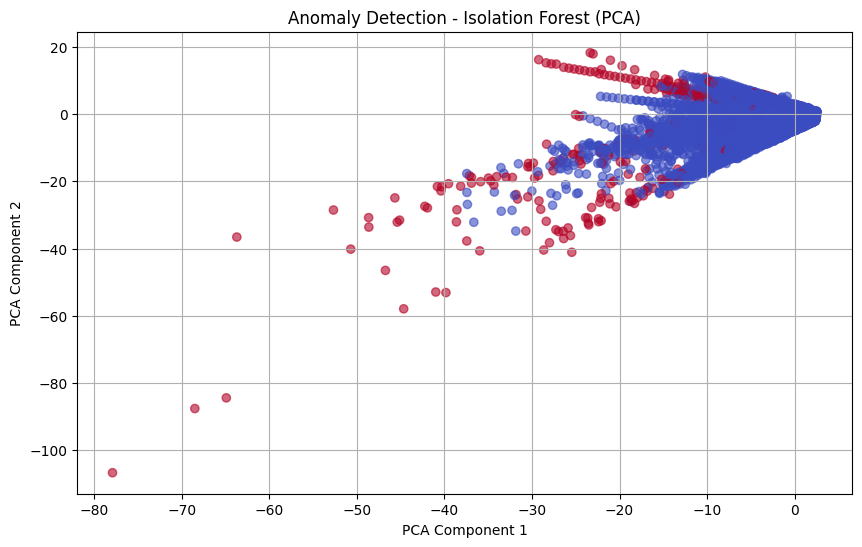

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_pred_iso, cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection - Isolation Forest (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

## One Class SVM

In [26]:
# trained only on normal transaction
from sklearn.svm import OneClassSVM

x_normal = X[y==0]
svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.001)
svm.fit(x_normal)

OneClassSVM(gamma='auto', nu=0.001)

In [27]:
y_pred_svm = svm.predict(X)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

In [28]:
classification_report(y, y_pred_svm)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    283253\n           1       0.23      0.79      0.36       473\n\n    accuracy                           1.00    283726\n   macro avg       0.62      0.89      0.68    283726\nweighted avg       1.00      1.00      1.00    283726\n'

In [29]:
cm_svm = confusion_matrix(y, y_pred_svm)
cm_svm

array([[282042,   1211],
       [   101,    372]])

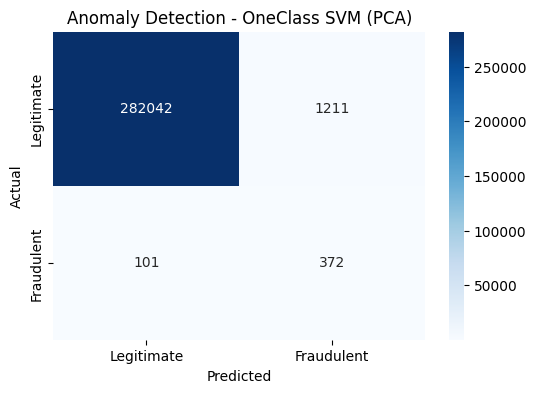

In [30]:
## Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xticks(ticks=[0.5, 1.5], labels= ['Legitimate', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels= ['Legitimate', 'Fraudulent'])
plt.title('Anomaly Detection - OneClass SVM (PCA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
roc_auc_score(y, y_pred_svm)

np.float64(0.8910970073900346)

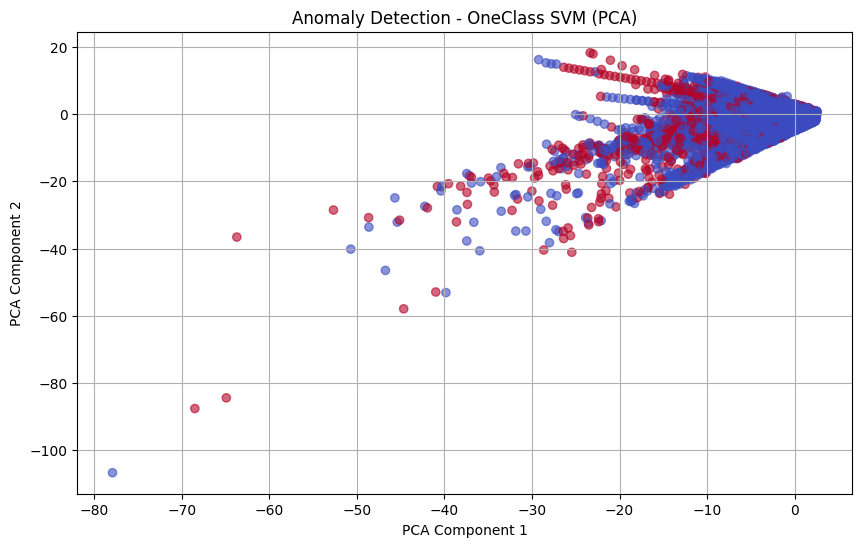

In [32]:
# PCA Visualization

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_pred_svm, cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection - OneClass SVM (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

<h2 style='color:green'>Local Outlier Factor</h2>

In [33]:
from sklearn.neighbors import LocalOutlierFactor

In [34]:
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.001)
y_pred_lof = lof.fit_predict(X)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

In [35]:
classification_report(y, y_pred_lof)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    283253\n           1       0.00      0.00      0.00       473\n\n    accuracy                           1.00    283726\n   macro avg       0.50      0.50      0.50    283726\nweighted avg       1.00      1.00      1.00    283726\n'

In [36]:
roc_auc_score(y, y_pred_lof)

np.float64(0.4994986813908414)

In [37]:
cm_lof = confusion_matrix(y, y_pred_lof)
cm_lof

array([[282969,    284],
       [   473,      0]])

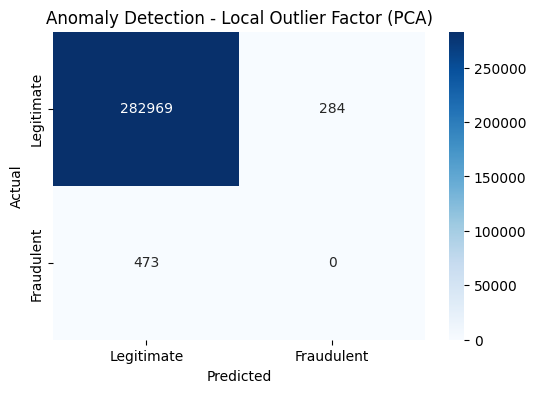

In [38]:
## Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lof, annot=True, cmap='Blues', fmt='d')
plt.xticks(ticks=[0.5, 1.5], labels= ['Legitimate', 'Fraudulent'])
plt.yticks(ticks=[0.5, 1.5], labels= ['Legitimate', 'Fraudulent'])
plt.title('Anomaly Detection - Local Outlier Factor (PCA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

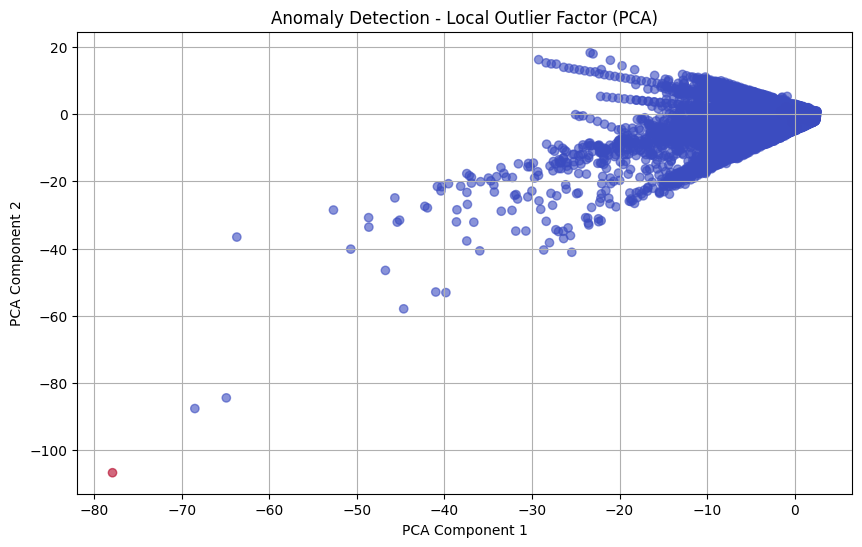

In [39]:
# PCA Visualization

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_pred_lof, cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection - Local Outlier Factor (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

<h2 style = 'color:green'>Save and Load the Model</h2>

In [40]:
import joblib

joblib.dump(iso, 'isolation_forest_model.pkl')
joblib.dump(svm, 'one_class_svm.pkl')
joblib.dump(lof, 'local_outlier_factor.pkl')

['local_outlier_factor.pkl']

In [42]:
loaded_model_iso = joblib.load('isolation_forest_model.pkl')

In [43]:
loaded_model_svm = joblib.load('one_class_svm.pkl')

In [44]:
new_transaction = X.iloc[0].values.reshape(1, -1)

In [47]:
# Actual
print('Fraud' if y[0] == 1 else 'Not Fraud')

Not Fraud


In [52]:
# predicted

print('IsolationForest:', 'Fraud' if loaded_model_iso.predict(new_transaction) == -1 else 'Not Fraud')
print('OneClassSVM:', 'Fraud' if loaded_model_svm.predict(new_transaction) == -1 else 'Not Fraud')

IsolationForest: Not Fraud
OneClassSVM: Not Fraud


/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
